<a href="https://colab.research.google.com/github/gnaneshwar925/Gnaneshwar/blob/main/Imdb_project(SA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

plain_text/unsupervised-00000-of-00001.p(…):   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

                                                text  label
0  I rented I AM CURIOUS-YELLOW from my video sto...      0
1  "I Am Curious: Yellow" is a risible and preten...      0
2  If only to avoid making this type of film in t...      0
3  This film was probably inspired by Godard's Ma...      0
4  Oh, brother...after hearing about this ridicul...      0
Label distribution: label
0    12500
1    12500
Name: count, dtype: int64


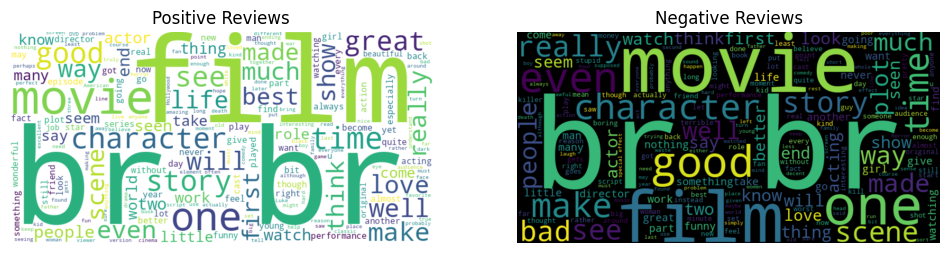

In [1]:
!pip install transformers torch datasets pandas matplotlib wordcloud gradio
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load IMDb dataset
dataset = load_dataset("imdb")

df_train = pd.DataFrame(dataset['train'])
df_test = pd.DataFrame(dataset['test'])

print(df_train.head())
print("Label distribution:", df_train['label'].value_counts())  # 0: negative, 1: positive

# Word clouds
positive_text = ' '.join(df_train[df_train['label'] == 1]['text'].head(1000))  # Sample for speed
negative_text = ' '.join(df_train[df_train['label'] == 0]['text'].head(1000))

wc_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wc_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(wc_pos, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wc_neg, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis('off')

plt.show()


                                                text  label
0  I rented I AM CURIOUS-YELLOW from my video sto...      0
1  "I Am Curious: Yellow" is a risible and preten...      0
2  If only to avoid making this type of film in t...      0
3  This film was probably inspired by Godard's Ma...      0
4  Oh, brother...after hearing about this ridicul...      0
Label distribution: label
0    12500
1    12500
Name: count, dtype: int64


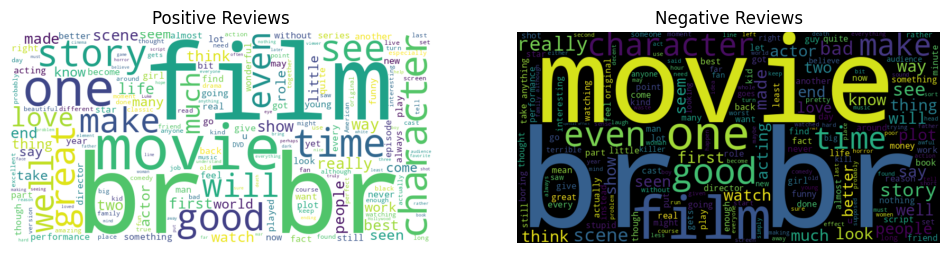

In [2]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load IMDb dataset
dataset = load_dataset("imdb")

df_train = pd.DataFrame(dataset['train'])
df_test = pd.DataFrame(dataset['test'])

print(df_train.head())
print("Label distribution:", df_train['label'].value_counts())  # 0: negative, 1: positive

# Word clouds
positive_text = ' '.join(df_train[df_train['label'] == 1]['text'].head(1000))  # Sample for speed
negative_text = ' '.join(df_train[df_train['label'] == 0]['text'].head(1000))

wc_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wc_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(wc_pos, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wc_neg, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis('off')

plt.show()


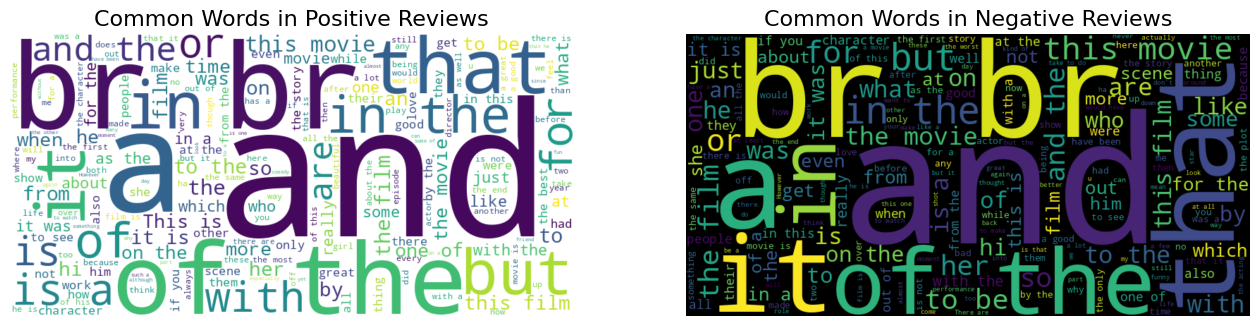

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample 1000 reviews from each class to speed up word cloud generation
positive_text = ' '.join(df_train[df_train['label'] == 1]['text'].head(1000))
negative_text = ' '.join(df_train[df_train['label'] == 0]['text'].head(1000))

# Create word clouds
wc_pos = WordCloud(width=800, height=400, background_color='white', stopwords='english').generate(positive_text)
wc_neg = WordCloud(width=800, height=400, background_color='black', stopwords='english').generate(negative_text)

# Plot
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(wc_pos, interpolation='bilinear')
plt.title('Common Words in Positive Reviews', fontsize=16)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wc_neg, interpolation='bilinear')
plt.title('Common Words in Negative Reviews', fontsize=16)
plt.axis('off')

plt.show()

In [5]:
from transformers import pipeline
import gradio as gr

# Load the pre-trained sentiment model
sentiment_pipeline = pipeline("sentiment-analysis",
                              model="distilbert-base-uncased-finetuned-sst-2-english")

def predict_sentiment(text):
    result = sentiment_pipeline(text)[0]
    label = "POSITIVE" if result['label'] == 'POSITIVE' else "NEGATIVE"
    score = result['score']
    return f"{label} (Confidence: {score:.2f})"

# Create the Gradio interface
interface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=7, placeholder="Paste a movie review here...", label="Movie Review"),
    outputs=gr.Textbox(label="Predicted Sentiment"),
    title="🎥 Movie Review Sentiment Analyzer",
    description="Uses a fine-tuned DistilBERT model from Hugging Face to classify reviews as Positive or Negative.",
    examples=[
        ["This movie was a masterpiece! The acting, plot, and visuals were all incredible."],
        ["Terrible film. Boring storyline, bad acting, and wasted two hours of my life."],
        ["It was an okay movie, nothing special but not bad either."]
    ],
    theme="soft"
)

# Launch with public share link
interface.launch(share=True)

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d141900a5f486392c8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [13]:
from transformers import pipeline
import gradio as gr

# Load a reliable 5-star sentiment model (maps to 3 classes)
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="nlptown/bert-base-multilingual-uncased-sentiment"
)

def predict_sentiment(text):
    if not text.strip():
        return "Please enter a review."

    result = sentiment_pipeline(text)[0]
    label = result['label']  # e.g., '1 star', '3 stars', '5 stars'
    score = result['score']

    # Map to 3 classes
    stars = int(label.split()[0])
    if stars <= 2:
        sentiment = "NEGATIVE"
    elif stars == 3:
        sentiment = "NEUTRAL"
    else:
        sentiment = "POSITIVE"

    return f"{sentiment} (Confidence: {score:.2f})\n\nOriginal rating: {label} (Score: {score:.2f})"

# Gradio interface
interface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=7, placeholder="Enter a movie review here...", label="Movie Review"),
    outputs=gr.Textbox(label="Sentiment Prediction"),
    title="🎥 Movie Review Sentiment Analyzer (Positive / Neutral / Negative)",
    description="BERT model fine-tuned on product reviews – reliably detects 3 sentiment classes.",
    examples=[
        ["This was an absolute masterpiece! The best film ever."],
        ["Terrible film. Complete waste of time."],
        ["It was okay, nothing special."],
        ["Pretty average movie, some good parts."]
    ],
    theme="soft"
)

interface.launch(share=True)

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a6965b38b380028d82.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
